In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns={'Genre':'Gender'},inplace=True)

In [5]:
data = data.drop('CustomerID',1)

In [6]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Visualizing numerical columns distribution

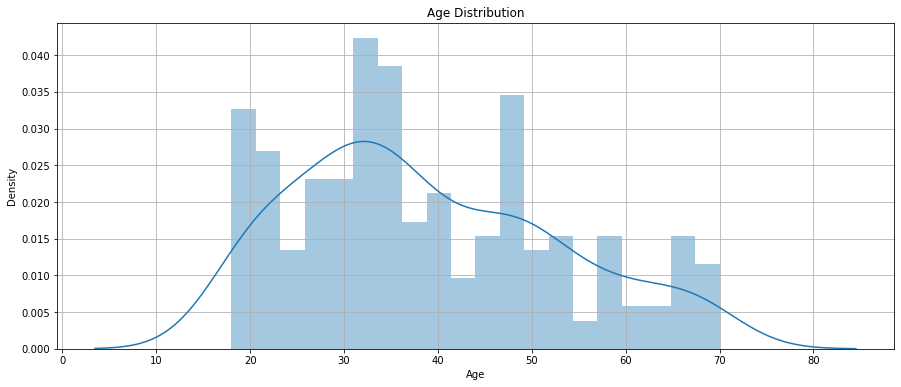

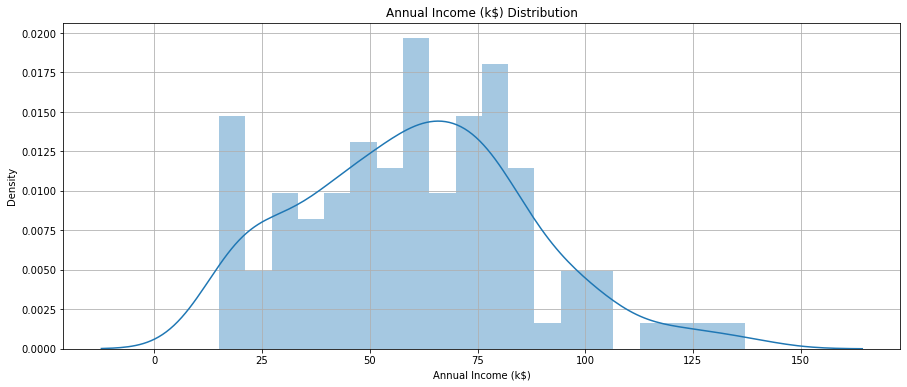

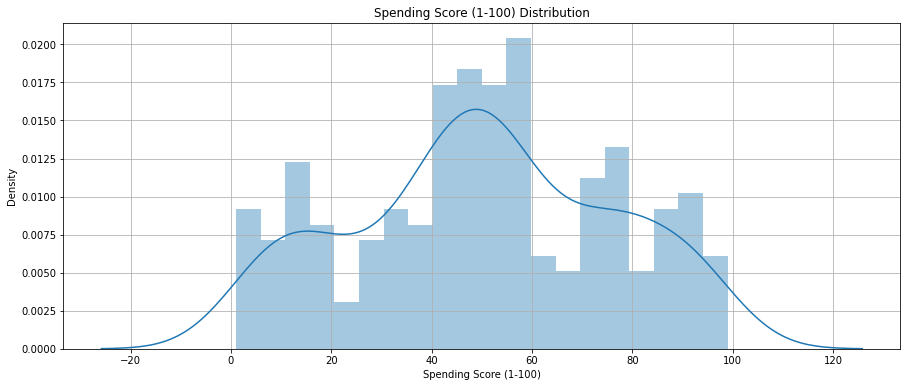

In [7]:
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure(figsize=(15,6))
        sns.distplot(data[column],bins=20)
        plt.title(f'{column} Distribution')
        plt.grid()
        plt.show()

### Dividing ages into sub-groups 

In [8]:
label_names= ['18-25yrs','26-37yrs','38-50yrs','51-60yrs','60-70yrs']
boundaries = [18,26,38,51,60,70]
data['Age_classes'] = pd.cut(data['Age'],boundaries,labels = label_names)

In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_classes
0,Male,19,15,39,18-25yrs
1,Male,21,15,81,18-25yrs
2,Female,20,16,6,18-25yrs
3,Female,23,16,77,18-25yrs
4,Female,31,17,40,26-37yrs


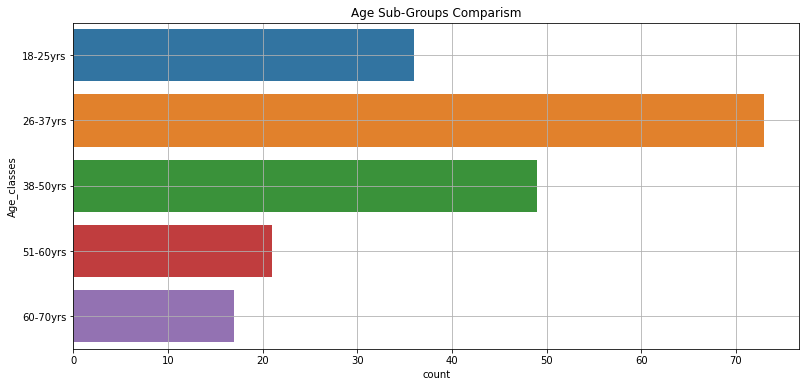

In [10]:
plt.figure(figsize=(13,6))
sns.countplot(y='Age_classes',data=data)
plt.title('Age Sub-Groups Comparism')
plt.grid()
plt.show()

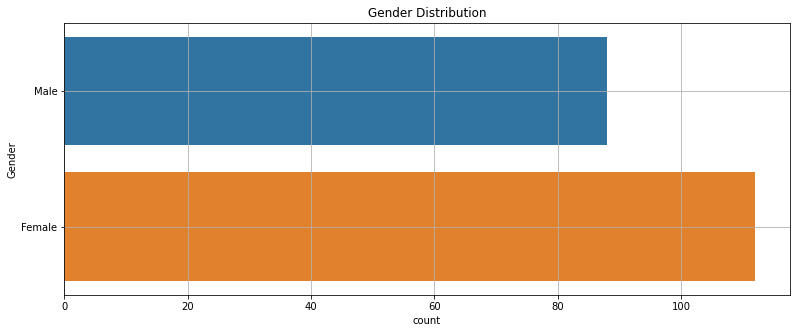

In [11]:
plt.figure(figsize=(13,5))
sns.countplot(y='Gender',data=data)
plt.title('Gender Distribution')
plt.grid()
plt.show()

In [12]:
data.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_classes
0,Male,19,15,39,18-25yrs
1,Male,21,15,81,18-25yrs


### Age groups comparism in relation to spending score [Bivariate comparism]

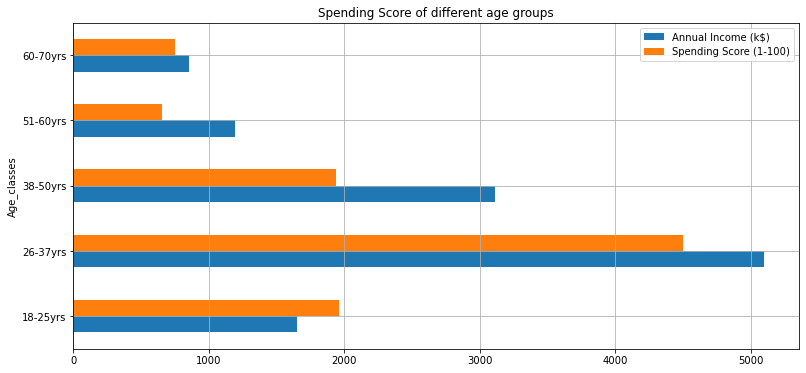

In [13]:
data.groupby('Age_classes').sum().drop('Age',axis=1).plot(kind='barh',figsize=(13,6))
plt.title('Spending Score of different age groups')
plt.grid()
plt.show()

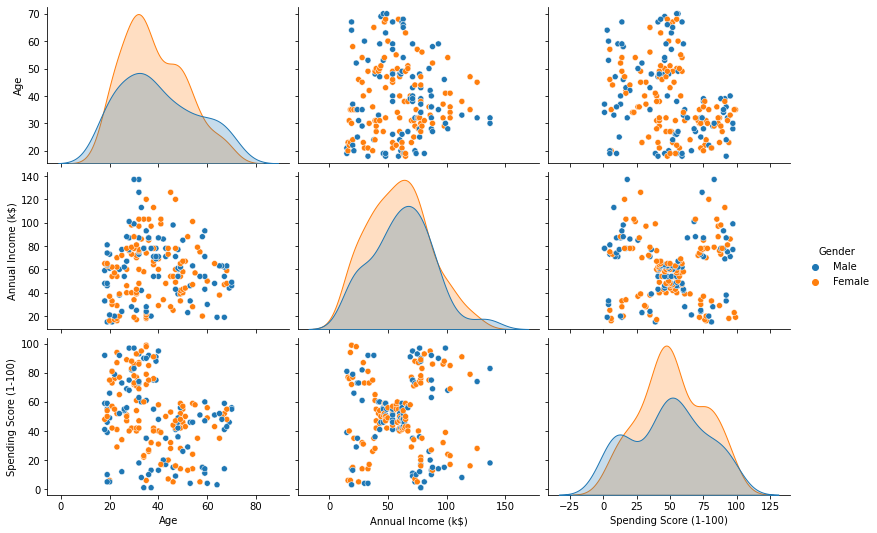

In [14]:
sns.pairplot(data, hue='Gender', aspect=1.5)
plt.show()

### Data Correlation

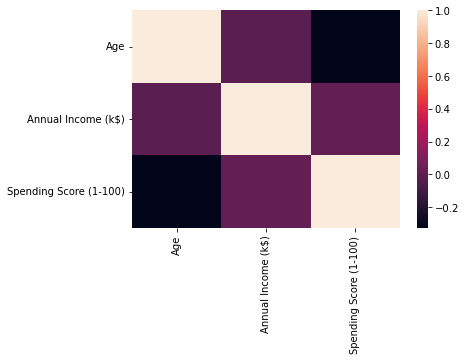

In [15]:
sns.heatmap(data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr())
plt.show()

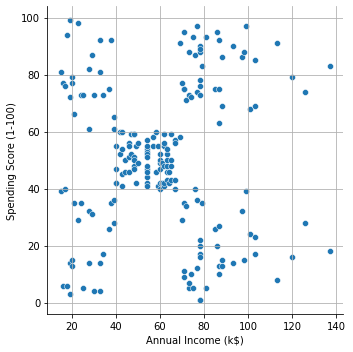

In [16]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.grid()
plt.show()

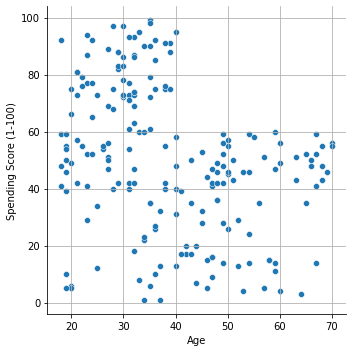

In [17]:
sns.relplot(x='Age',y='Spending Score (1-100)',data=data)
plt.grid()
plt.show()

<Figure size 576x432 with 0 Axes>

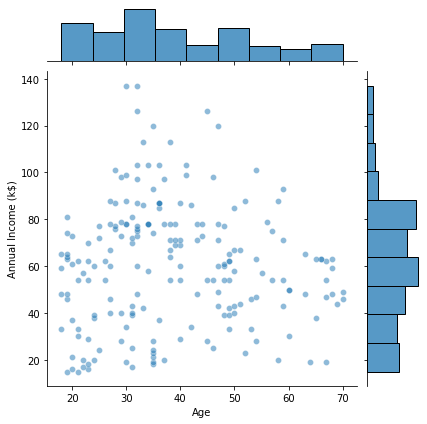

In [18]:
plt.figure(figsize=(8,6))
sns.jointplot(data['Age'],data['Annual Income (k$)'],alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

### Finding the optimum number of clustering k value for the data using the elbow method

In [19]:
data.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_classes
0,Male,19,15,39,18-25yrs
1,Male,21,15,81,18-25yrs
2,Female,20,16,6,18-25yrs


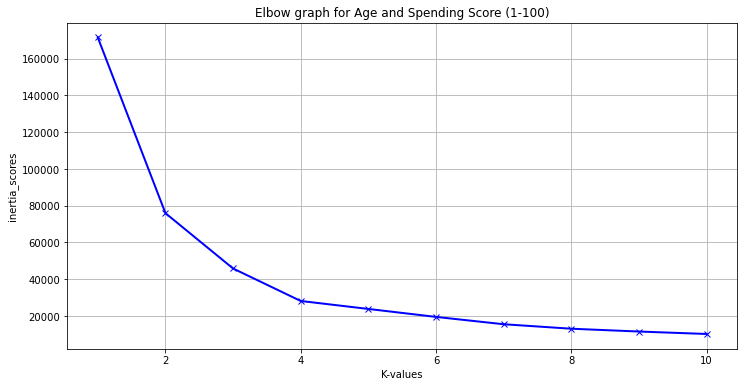

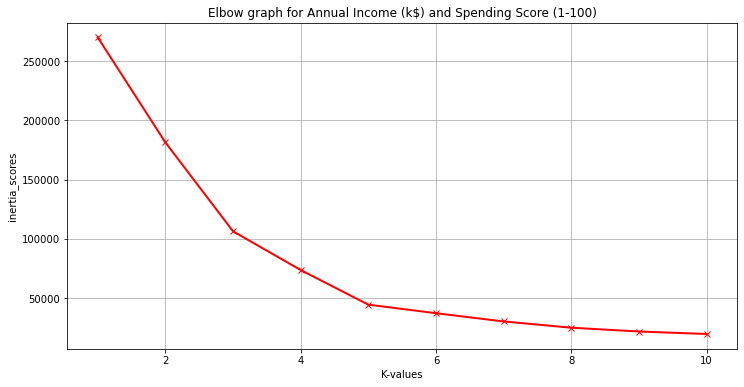

In [20]:
import random 

for variable in ['Age','Annual Income (k$)'] :
    X = data.loc[:,[variable,'Spending Score (1-100)']] #### preparing train data............
    from sklearn.cluster import KMeans
    inertia_scores = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k,init='k-means++')
        kmeans.fit(X)
        inertia_scores.append(kmeans.inertia_) # used to keep track .inertia after fitting is used to get the inertia point
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(range(1,11), inertia_scores, linewidth=2, color= random.choice(['red','blue','green']), marker='x')
    plt.title(f'Elbow graph for {variable} and Spending Score (1-100)')
    plt.xlabel('K-values')
    plt.ylabel('inertia_scores')
    plt.show()

elbow point for age and spending score = 4

elbow point for annual income and spending score = 5

### Making use of all 3 Independent variables for clustering analysis

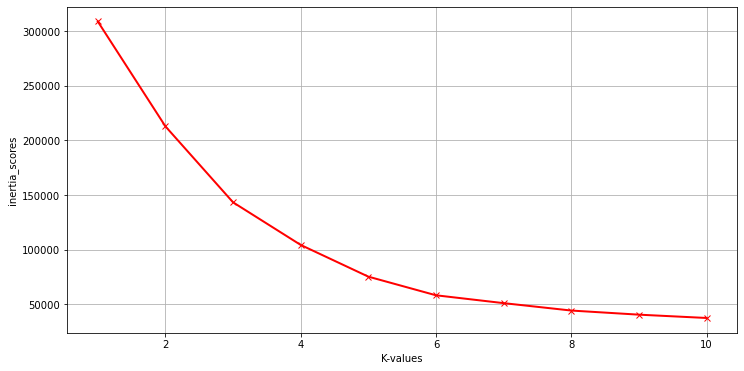

In [21]:
complete_data = data.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']]
inertia_scores = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(complete_data)
    inertia_scores.append(kmeans.inertia_) # used to keep track .inertia after fitting is used to get the inertia point
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), inertia_scores, linewidth=2, color='red', marker='x')
plt.xlabel('K-values')
plt.ylabel('inertia_scores')
plt.show()

In [22]:
model = KMeans(n_clusters=5)
model.fit(complete_data)
clusters = model.predict(complete_data)

In [23]:
data['Clusters'] = clusters

In [24]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_classes,Clusters
0,Male,19,15,39,18-25yrs,4
1,Male,21,15,81,18-25yrs,2
2,Female,20,16,6,18-25yrs,4
3,Female,23,16,77,18-25yrs,2
4,Female,31,17,40,26-37yrs,4


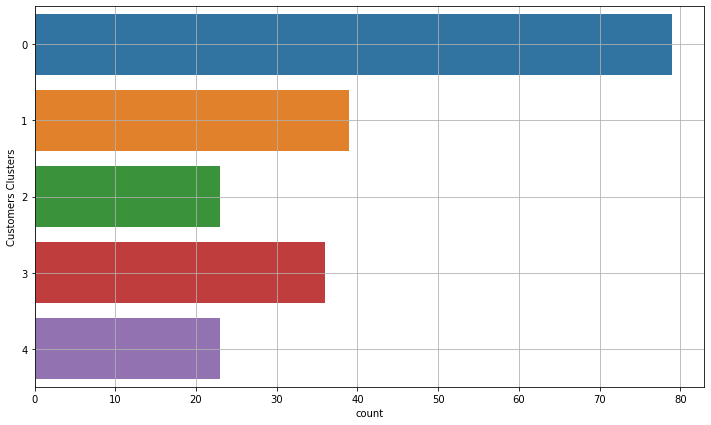

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(y='Clusters',data=data)
plt.grid()
plt.ylabel('Customers Clusters')
plt.show()

In [26]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_classes,Clusters
0,Male,19,15,39,18-25yrs,4
1,Male,21,15,81,18-25yrs,2
2,Female,20,16,6,18-25yrs,4
3,Female,23,16,77,18-25yrs,2
4,Female,31,17,40,26-37yrs,4


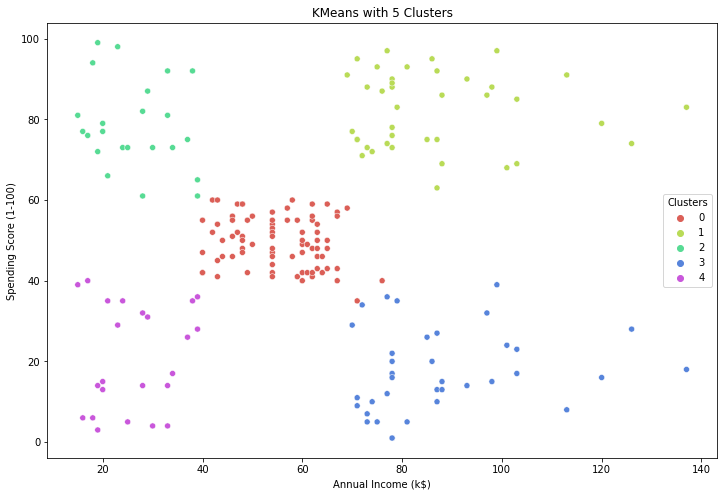

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['Clusters'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()